In [106]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
plt.style.use('bmh')

In [72]:
data = pd.read_csv("../Data/final_dataset.csv")
data.head()

,Emoji,Capital Words,User Mentions,Hashtags,Slang laughter Exp,Punctuations,+ve Words,-ve words,neutral wors,Polarity,Polarity flip,label
0,0,12,0,0,0,0,2,2,8,-0.23,1,1
1,4,12,0,0,0,0,3,2,9,0.84,1,1
2,0,5,0,0,0,0,2,0,3,0.80,0,1
3,2,8,0,0,0,0,3,0,9,0.87,0,1
4,0,9,0,0,0,0,0,0,10,0.00,0,1


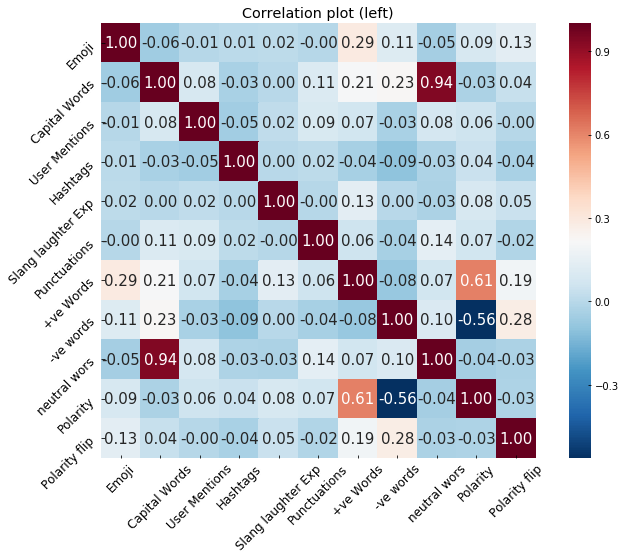

In [73]:
columns = ['Emoji', 'Capital Words', 'User Mentions', 'Hashtags', 'Slang laughter Exp', 'Punctuations', 
          '+ve Words', '-ve words', 'neutral wors', 'Polarity', 'Polarity flip']

plt.figure(figsize=(12,8))
cm = np.corrcoef(data[columns].values.T)
hm = sns.heatmap(cm,
                 cmap = "RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=columns,
                 xticklabels=columns)

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(rotation = 45, fontsize = 12)
plt.title("Correlation plot (left)")
plt.savefig('correlation_map.jpg')
# Show heat map
plt.show()

In [74]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [98]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=0) #Create an instance of classifier
    clf.fit(X_train, y_train) #fit the classifier to Train data
    feature_importances = clf.feature_importances_ #retrieve feature importances
    
    plot_importances = pd.Series(feature_importances, data.columns[:-1])
    plot_importances.sort_values(ascending = False, inplace = True) #sort the feature importance in descending order
    plt.figure(figsize = (12,8), dpi = 250)
    plot_importances.plot(x='Features', y='Importance', kind = 'bar', rot = 45)    #plot feature importance
    plt.xticks(rotation='vertical')
    #plt.savefig("feature_importances.png")
    plt.tight_layout()
    plt.savefig('feature_importance.jpg')
    plt.show()
    
    y_pred = clf.predict(X_test) #predict on test data
    
    #calculate precision, recall, fscore and support
    tp,fp,tn,fn=0,0,0,0
    for predicted,actual in zip(y_pred,y_test):
        if(predicted==actual and predicted==1): tp+=1
        elif(predicted==actual and predicted==0):tn+=1
        elif(predicted==0):fn+=1
        else:fp+=1
    
    accuracy = round(accuracy_score(y_test, y_pred),2)
    precision = round(float(tp)/(tp+fp),2)
    recall = round(float(tp)/(tp+fn),2)
    fscore = round(2*precision*recall/(precision+recall),2) 
    return accuracy,round(precision,2),round(recall,2),round(fscore,2)

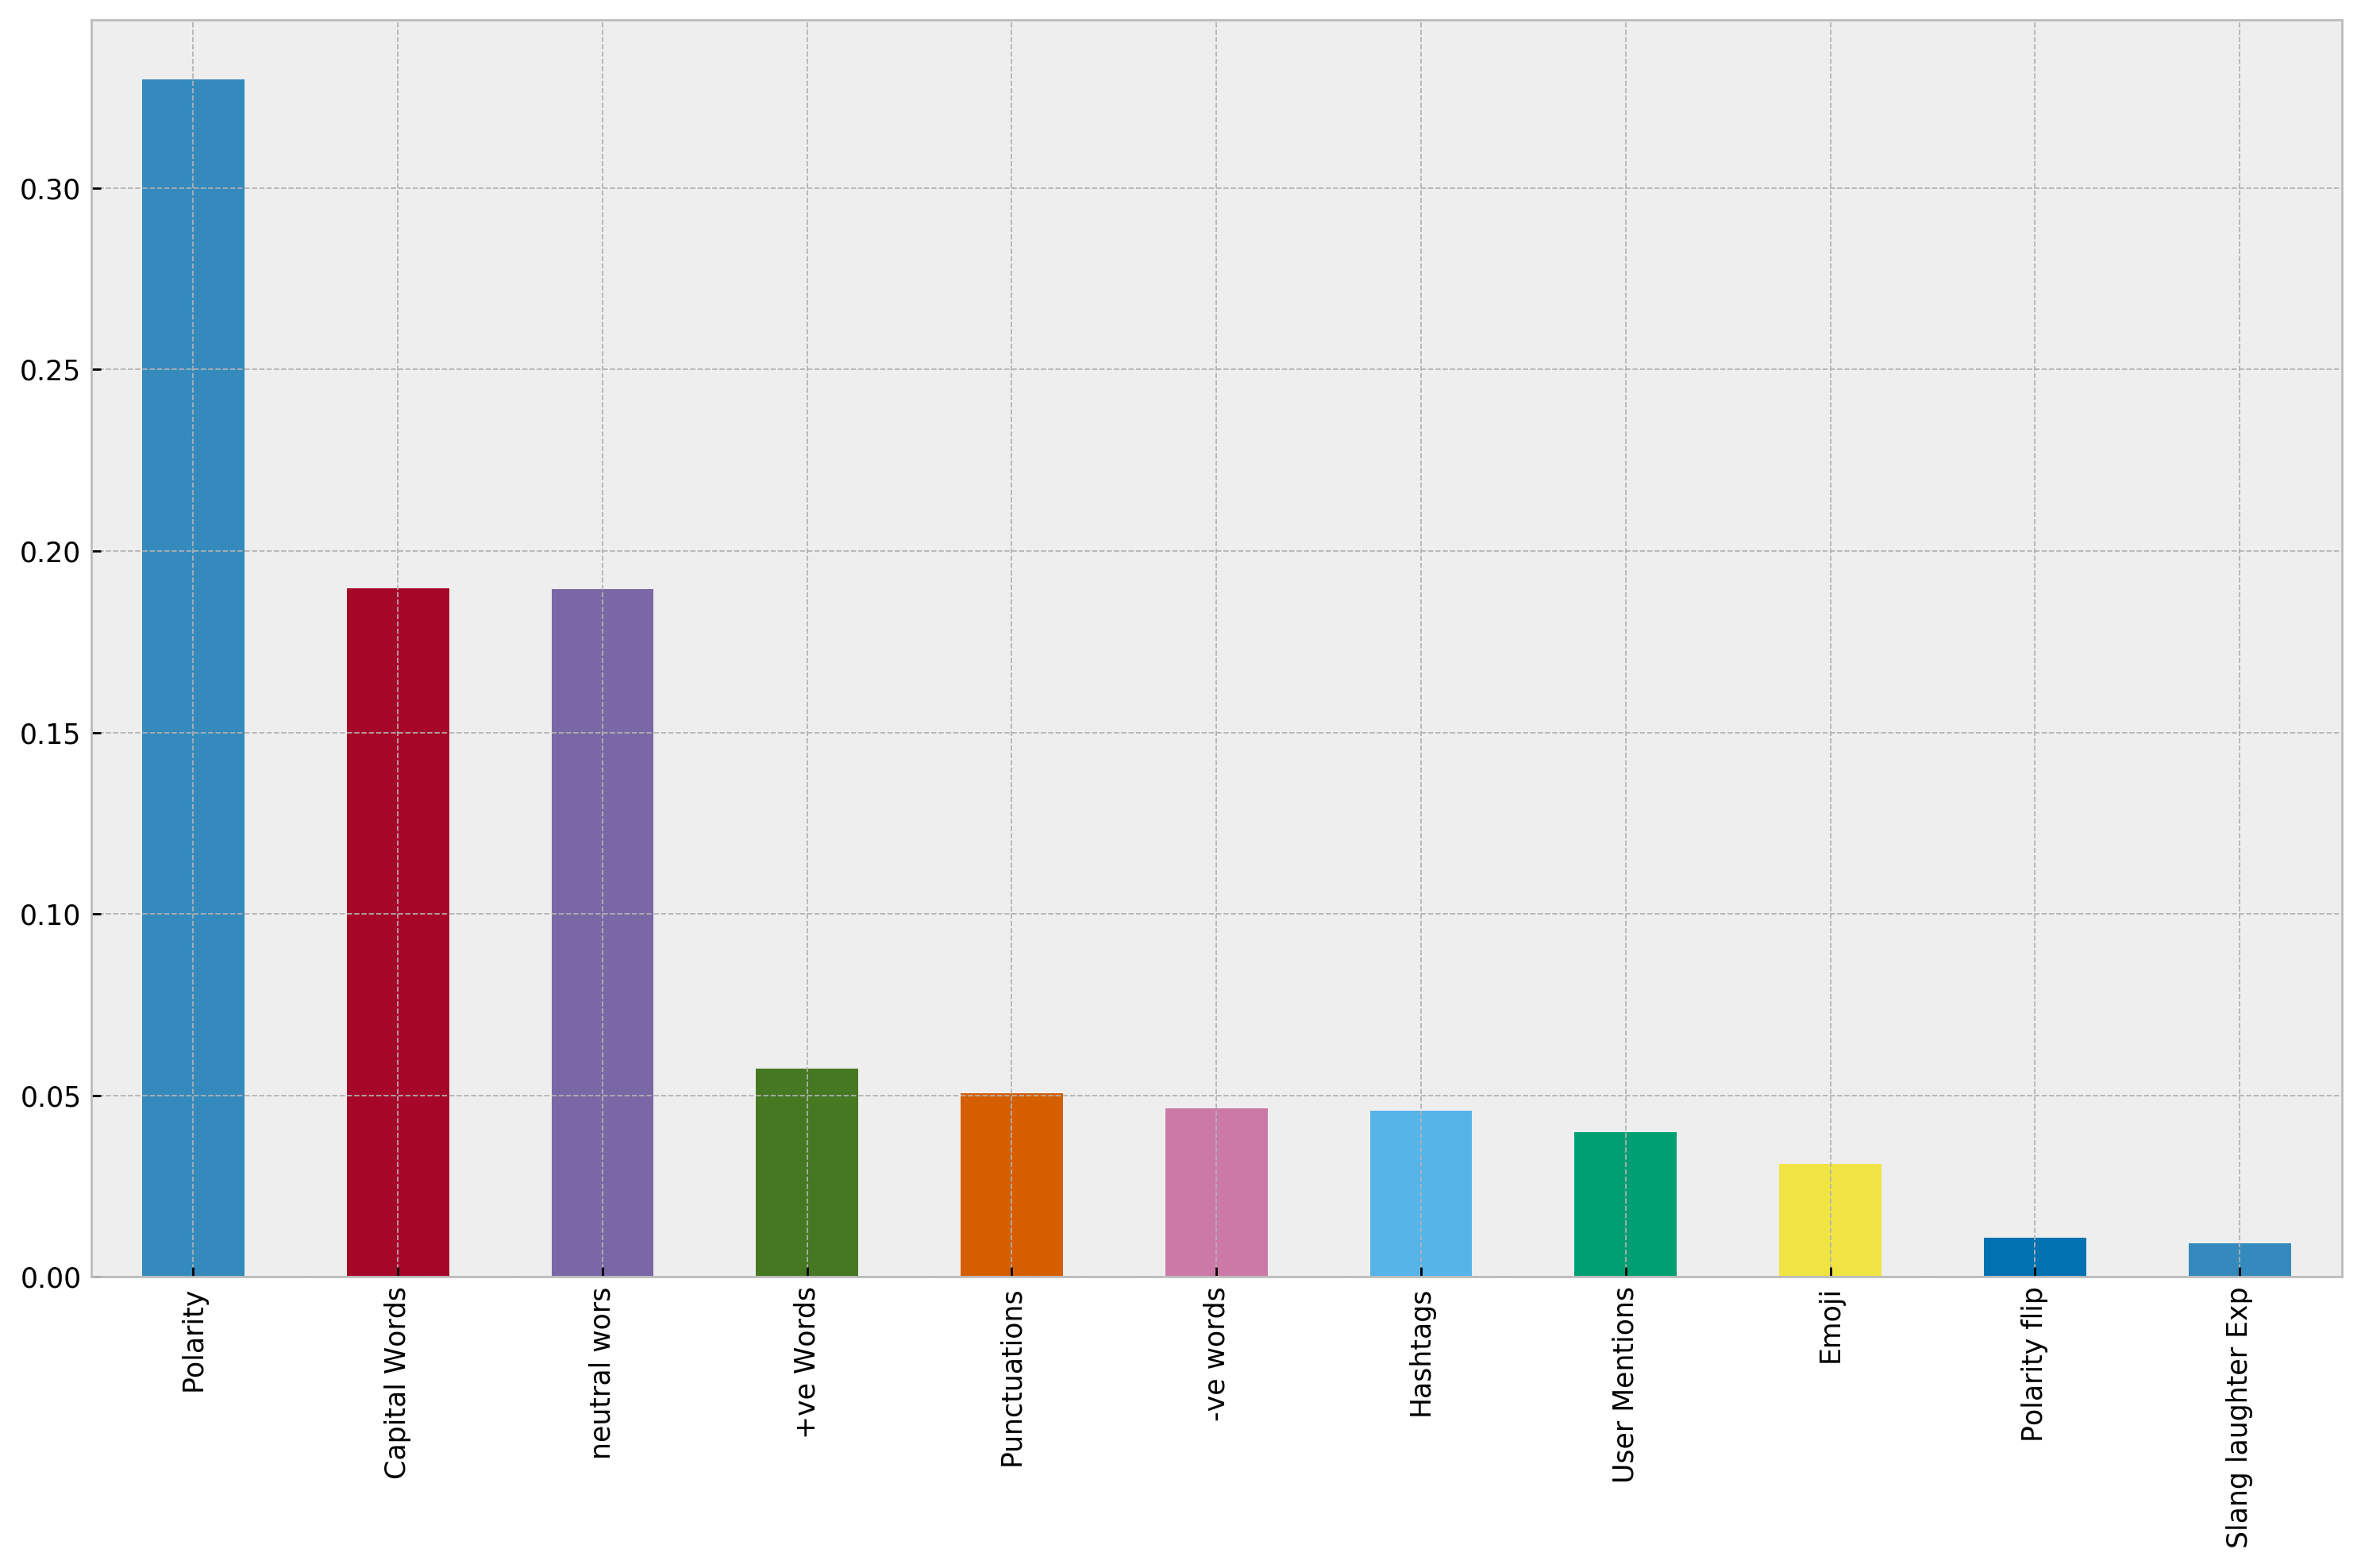

(0.59, 0.58, 0.53, 0.55)


In [134]:
output_rf = random_forest(X_train_std, X_test_std, y_train, y_test)

In [102]:
def svm_classifier(X_train, X_test, y_train, y_test):
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test_std)
    
    tp,fp,tn,fn=0,0,0,0
    for predicted,actual in zip(y_pred,y_test):
        if(predicted==actual and predicted==1): tp+=1
        elif(predicted==actual and predicted==0):tn+=1
        elif(predicted==0):fn+=1
        else:fp+=1
    
    accuracy = round(accuracy_score(y_test, y_pred),2)
    precision = round(float(tp)/(tp+fp),2)
    recall = round(float(tp)/(tp+fn),2)
    fscore = round(2*precision*recall/(precision+recall),2)
    
    return accuracy, precision, recall, fscore


In [135]:
output_svm = svm_classifier(X_train_std, X_test_std, y_train, y_test)

In [107]:
X_train.shape

(31744, 11)

In [128]:
def neural_network(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(Dense(output_dim = 8, input_dim=X_train.shape[1], init='uniform', activation='relu'))
    model.add(Dense(output_dim = 1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    model.fit(X_train, y_train, nb_epoch=25, batch_size=64)
    scores = model.evaluate(X_train, y_train)
    y_pred = model.predict(X_test)
    rounded = [int(round(x[0])) for x in y_pred]
    tp,fp,tn,fn=0,0,0,0
    for predicted,actual in zip(rounded,y_test):
        if(predicted==actual and predicted==1): tp+=1
        elif(predicted==actual and predicted==0):tn+=1
        elif(predicted==0):fn+=1
        else:fp+=1
    
    accuracy = round(scores[1], 2)
    precision = round(float(tp)/(tp+fp),2)
    recall = round(float(tp)/(tp+fn),2)
    fscore = round(2*precision*recall/(precision+recall),2)
    
    return accuracy, precision, recall, fscore

In [136]:
output_nn = neural_network(X_train_std, X_test_std, y_train, y_test)

/home/darshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=8, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/darshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/darshan/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
31744/31744 [==============================] - 1s 30us/step - loss: 0.6923 - acc: 0.5183
Epoch 2/25
31744/31744 [==============================] - 1s 21us/step - loss: 0.6917 - acc: 0.5196
Epoch 3/25
31744/31744 [==============================] - 1s 22us/step - loss: 0.6910 - acc: 0.5196
Epoch 4/25
31744/31744 [==============================] - 1s 23us/step - loss: 0.6900 - acc: 0.5196
Epoch 5/25
31744/31744 [==============================] - 1s 21us/step - loss: 0.6884 - acc: 0.5196
Epoch 6/25
31744/31744 [==============================] - 1s 23us/step - loss: 0.6861 - acc: 0.5196
Epoch 7/25
31744/31744 [==============================] - 1s 23us/step - loss: 0.6832 - acc: 0.5455
Epoch 8/25
31744/31744 [==============================] - 1s 22us/step - loss: 0.6803 - acc: 0.5801
Epoch 9/25
31744/31744 [==============================] - 1s 23us/step - loss: 0.6776 - acc: 0.5878
Epoch 10/25
31744/31744 [==============================] - 1s 22us/step - loss: 0.6754 - acc: 0.5954

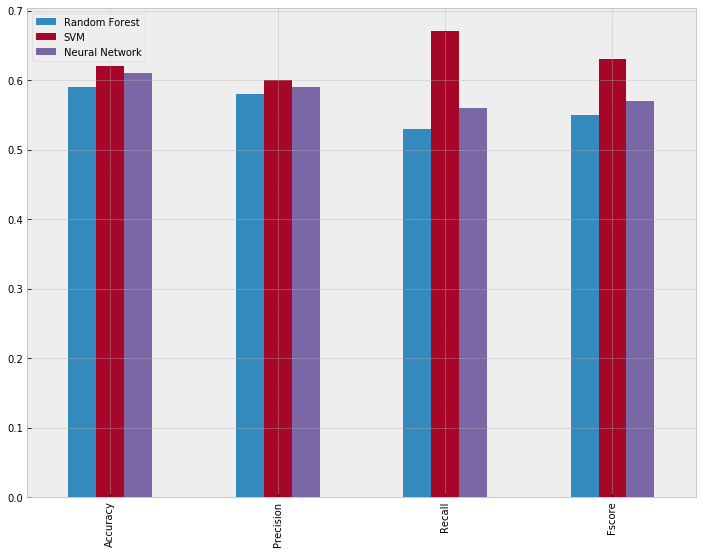

In [156]:
rf_output = np.asarray(list(output_rf))
svm_output = np.asarray(list(output_svm))
nn_output = np.asarray(list(output_nn))

dataframe = pd.DataFrame(np.vstack((rf_output, svm_output, nn_output)), columns = ['Accuracy', 'Precision', 'Recall', 'Fscore'], 
             index = ['Random Forest', 'SVM', 'Neural Network']).T

dataframe.plot(kind = 'bar', figsize=(12,9))
plt.savefig('model_eval.jpg')
plt.show()